<h1 style="text-align:center; color:#000000; font-weight:bold;">Airline satisfaction</h1>

- [Dataset Description](#1)
- [Import libraries](#2)
- [Reading the data](#3)
- [Data exploration](#4)
- [Data preparation & EDA](#5)
- [Conclusions](#6)
- [PreProcessing](#7)
- [Modeling](#8)
****

# Dataset Description

## [Dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

- **id :** passengers id.
- **Gender :** Gender of the passengers (Female, Male).
- **Customer Type :** The customer type (Loyal customer, disloyal customer).
- **Age :** The actual age of the passengers.
- **Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel).
- **Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- **Flight distance:** The flight distance of this journey
- **Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- **Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient
- **Ease of Online booking:** Satisfaction level of online booking
- **Gate location :** Satisfaction level of Gate location
- **Food and drink:** Satisfaction level of Food and drink
- **Online boarding:** Satisfaction level of online boarding
- **Seat comfort:** Satisfaction level of Seat comfort
- **Inflight entertainment:** Satisfaction level of inflight entertainment
- **On-board service:** Satisfaction level of On-board service
- **Leg room service:** Satisfaction level of Leg room service
- **Baggage handling:** Satisfaction level of baggage handling
- **Check-in service:** Satisfaction level of Check-in service
- **Inflight service:** Satisfaction level of inflight service
- **Cleanliness:** Satisfaction level of Cleanliness
- **Departure Delay in Minutes:** Minutes delayed when departure
- **Arrival Delay in Minutes:** Minutes delayed when Arrival
- **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Import libraries

In [1]:
# Cleaning and Viualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## Remove Warning

In [3]:
import warnings
warnings.simplefilter("ignore")

# Reading the data

In [4]:
# Load the train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Concatenate the datasets vertically (stacking one on top of the other)
df = pd.concat([train, test], axis=0)

# Reset the index to ensure it is continuous
df = df.reset_index(drop=True)
pd.set_option('display.max_columns',None)
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


# Data exploration

In [5]:
df.shape

(129880, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [7]:
df.nunique().sort_values(ascending=False)

id                                   129880
Unnamed: 0                           103904
Flight Distance                        3821
Arrival Delay in Minutes                472
Departure Delay in Minutes              466
Age                                      75
Seat comfort                              6
Cleanliness                               6
Inflight service                          6
Checkin service                           6
Leg room service                          6
On-board service                          6
Inflight entertainment                    6
Food and drink                            6
Online boarding                           6
Gate location                             6
Ease of Online booking                    6
Departure/Arrival time convenient         6
Inflight wifi service                     6
Baggage handling                          5
Class                                     3
Type of Travel                            2
Customer Type                   

In [8]:
df=df.drop(['id','Unnamed: 0'],axis=1)

In [9]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
df.describe(include = object)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


# Data preparation & EDA

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum().sort_values(ascending=False)

Arrival Delay in Minutes             393
Gender                                 0
Seat comfort                           0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Online boarding                        0
Customer Type                          0
Food and drink                         0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
satisfaction                           0
dtype: int64

In [13]:
objects=df[['Customer Type','satisfaction','Type of Travel','Class']]
objects

,Customer Type,satisfaction,Type of Travel,Class
0,Loyal Customer,neutral or dissatisfied,Personal Travel,Eco Plus
1,disloyal Customer,neutral or dissatisfied,Business travel,Business
2,Loyal Customer,satisfied,Business travel,Business
3,Loyal Customer,neutral or dissatisfied,Business travel,Business
4,Loyal Customer,satisfied,Business travel,Business
...,...,...,...,...
129875,disloyal Customer,neutral or dissatisfied,Business travel,Business
129876,Loyal Customer,satisfied,Business travel,Business
129877,Loyal Customer,neutral or dissatisfied,Personal Travel,Eco
129878,Loyal Customer,satisfied,Business travel,Business


## Gender

In [14]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

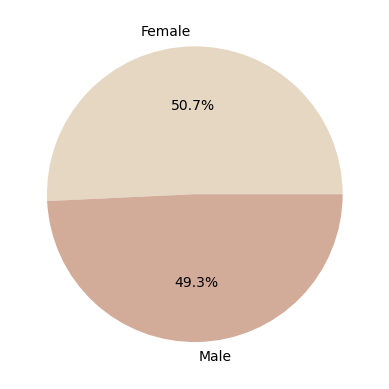

In [15]:
plt.pie(df.Gender.value_counts(), labels = ["Female", "Male"], colors = sns.color_palette("ch:.25"), autopct = '%1.1f%%')
pass

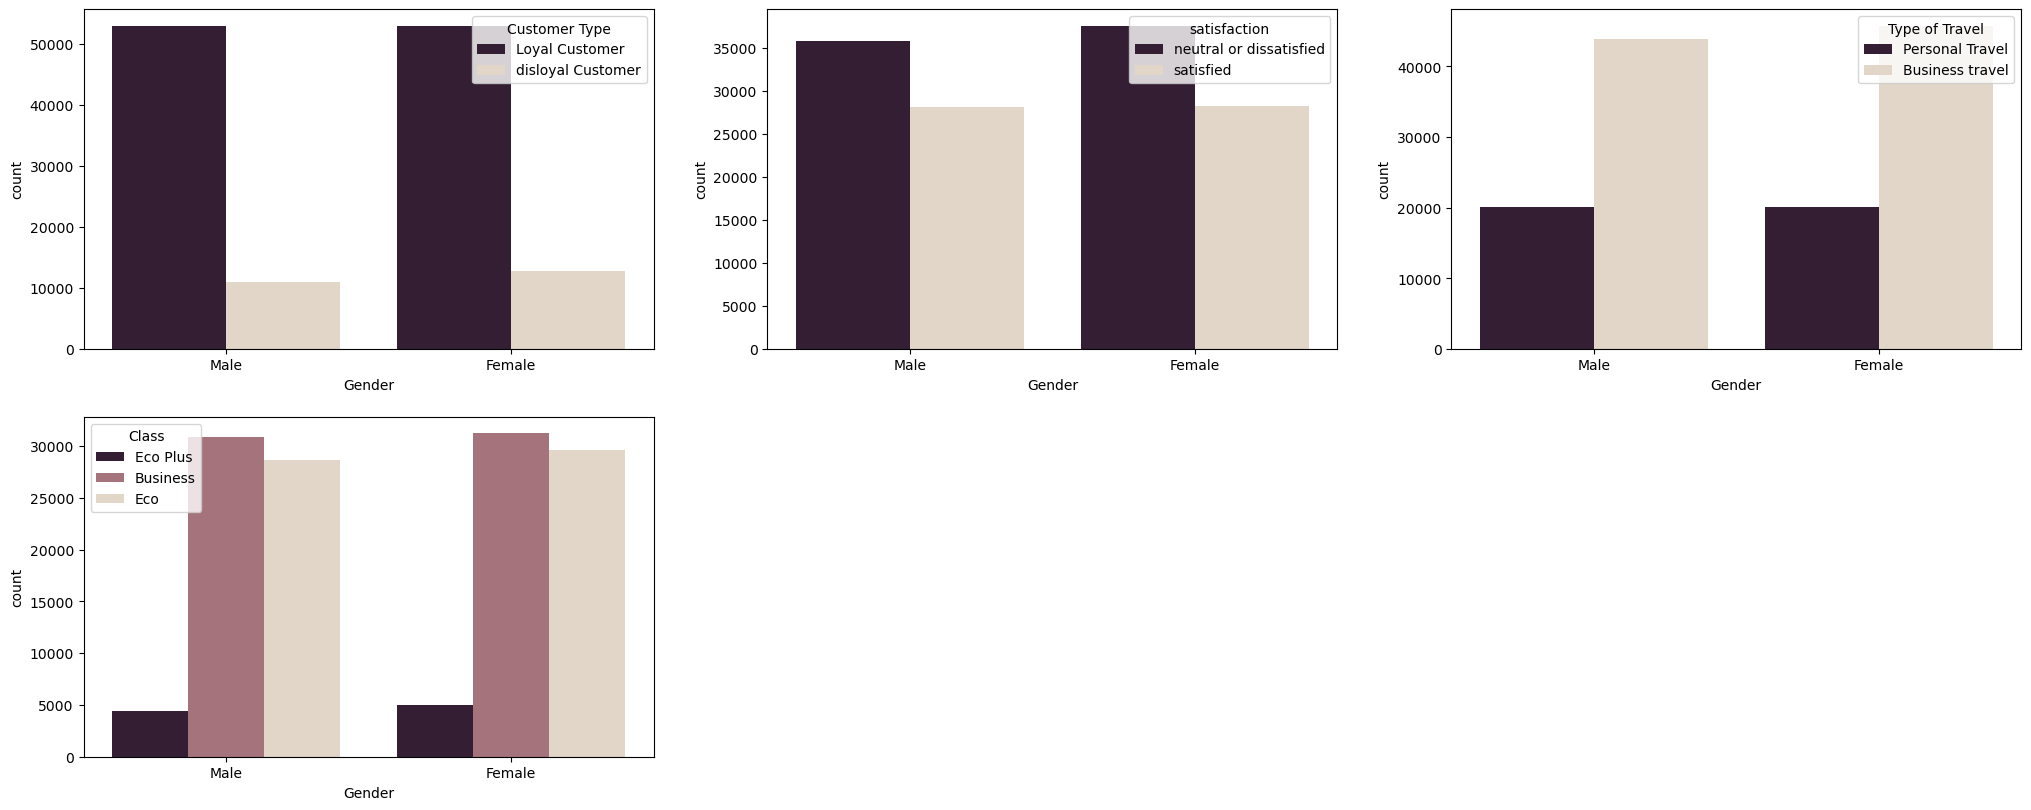

In [16]:
fig = plt.figure(figsize=(25,15))

counter = 0

for i in objects.columns:
    if objects[i].dtype == 'object':
        sub = fig.add_subplot(3,3,counter+1)
        g = sns.countplot(x='Gender',hue=i,data=df,palette="ch:.25_r")
        counter = counter + 1

In [17]:
# It seems like the gender has no effect on the satsfication so I will drop the column

df=df.drop(['Gender'],axis=1)

## Age

In [18]:
print(df['Age'].unique())

[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]


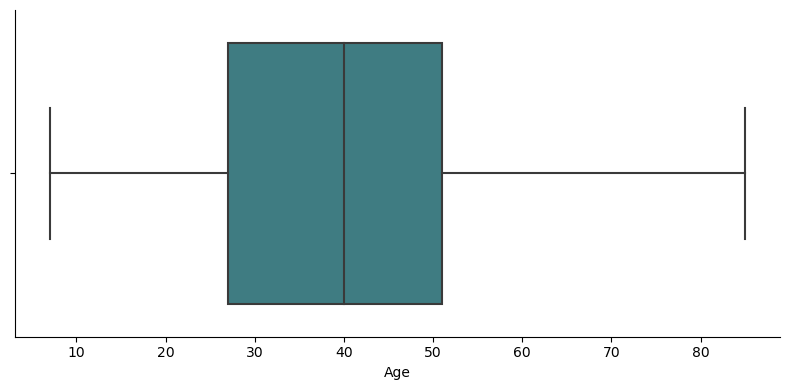

In [19]:
g = sns.catplot(x='Age',data=df,kind="box",palette="crest_r", height=4, aspect=2)
plt.show()

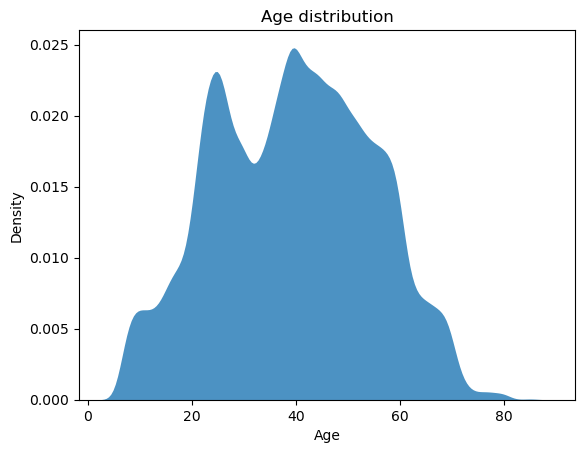

In [20]:
g=sns.kdeplot(data = df, x = 'Age', shade = True,palette="ch:.25",multiple="stack",fill=True, common_norm=False,alpha=.8, linewidth=0)
plt.title('Age distribution')
plt.show()

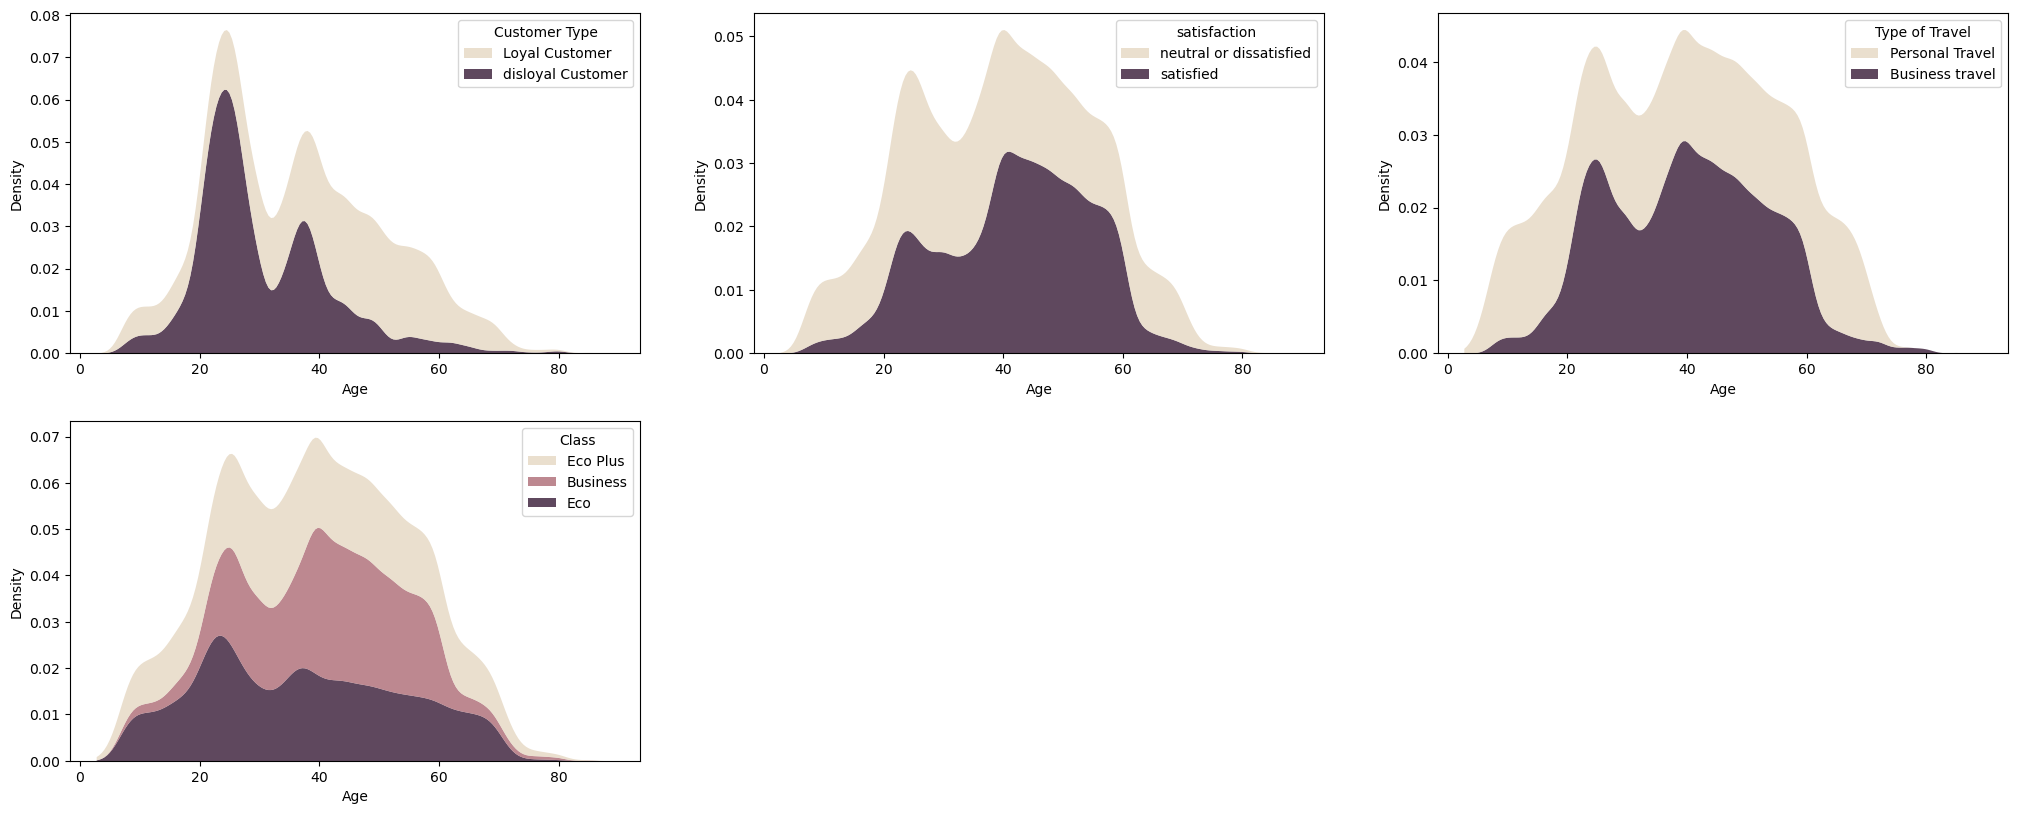

In [21]:
fig = plt.figure(figsize=(25,15))

counter = 0

for i in objects.columns:
    if objects[i].dtype == 'object':
        sub = fig.add_subplot(3,3,counter+1)
        g = sns.kdeplot(data = df, x = "Age",hue = i,palette="ch:.25",multiple="stack",fill=True, common_norm=False,alpha=.8, linewidth=0,)
        counter = counter + 1

<Axes: xlabel='Age', ylabel='Density'>

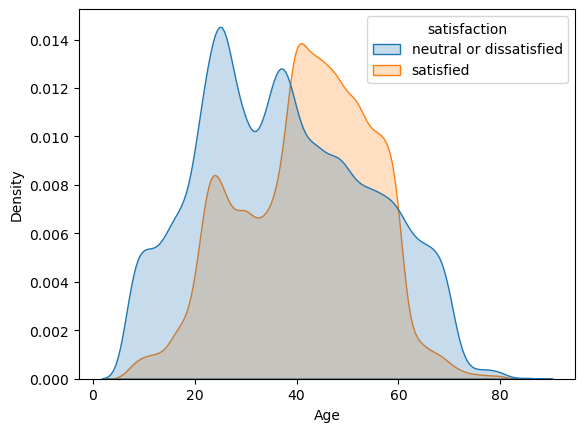

In [22]:
sns.kdeplot(data = df, x = "Age",hue = "satisfaction" , shade = True, color = "red")

## Customer Type

In [23]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

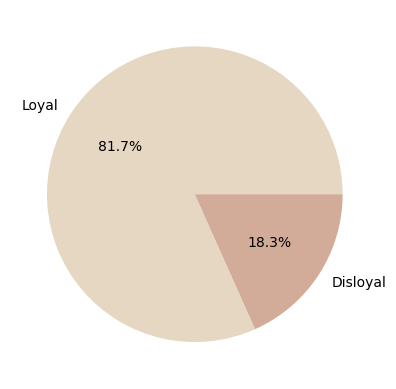

In [24]:
plt.pie(df['Customer Type'].value_counts(), labels = ["Loyal", "Disloyal"],colors = sns.color_palette("ch:.25"), autopct = '%1.1f%%')
pass

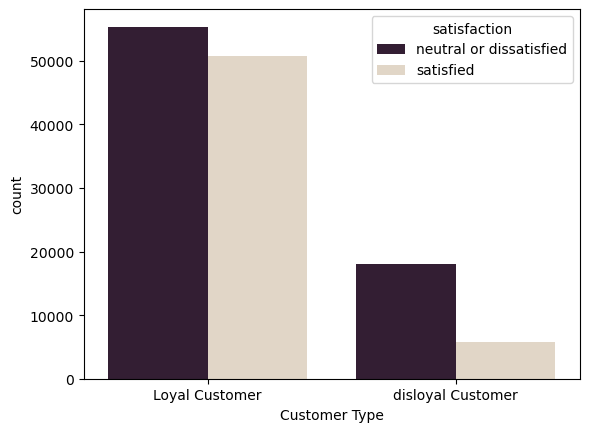

In [25]:
sns.countplot(x ='Customer Type', hue = 'satisfaction',palette="ch:.25_r", data = df)
plt.show()

## Type of Travel

In [26]:
df['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

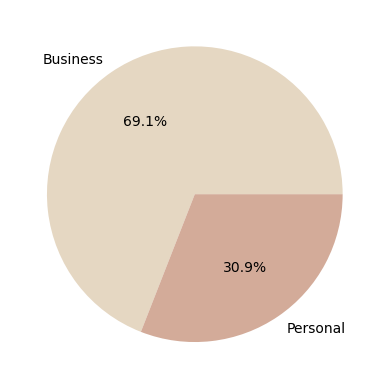

In [27]:
plt.pie(df['Type of Travel'].value_counts(), labels = ["Business", "Personal"],colors = sns.color_palette("ch:.25"), autopct = '%1.1f%%')
pass

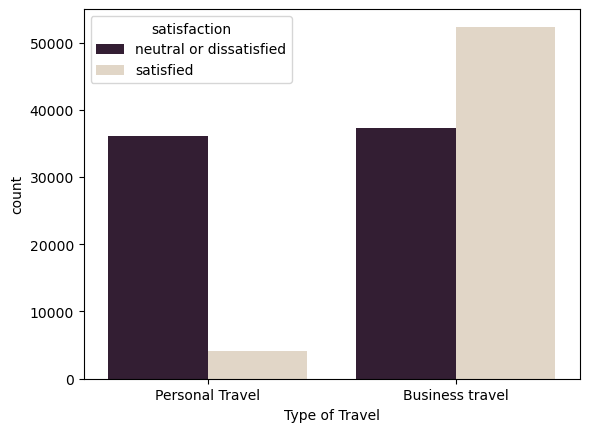

In [28]:
sns.countplot(x ='Type of Travel', hue = 'satisfaction',palette="ch:.25_r", data = df)
plt.show()

## Class

In [29]:
df['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

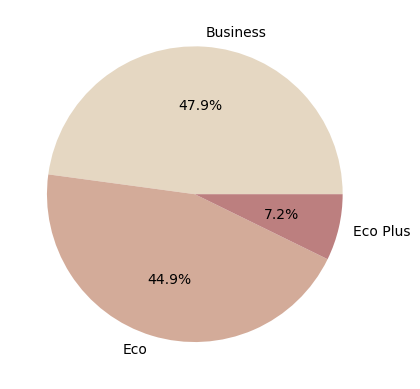

In [30]:
plt.pie(df['Class'].value_counts(), labels = ["Business","Eco", "Eco Plus"],colors = sns.color_palette("ch:.25"), autopct = '%1.1f%%')
pass

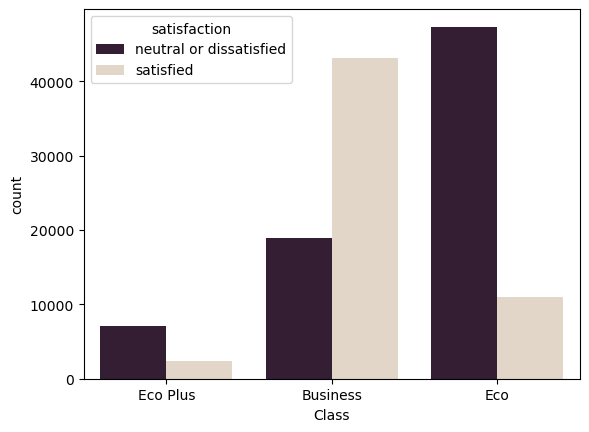

In [31]:
sns.countplot(x = 'Class', hue = 'satisfaction',palette="ch:.25_r", data = df)
plt.show()

## Delay

<Axes: xlabel='Departure Delay in Minutes', ylabel='Density'>

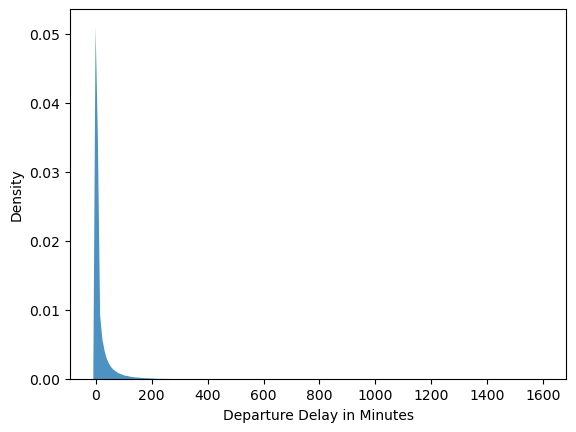

In [32]:
sns.kdeplot(data = df, x = "Departure Delay in Minutes", shade = True,palette="ch:.25",multiple="stack",fill=True, common_norm=False,alpha=.8, linewidth=0)

In [33]:
# Fill missing values in the "Arrival Delay in Minutes" column with the calculated median

arrival_delay_median = df["Arrival Delay in Minutes"].median()
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna( value = arrival_delay_median)

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Density'>

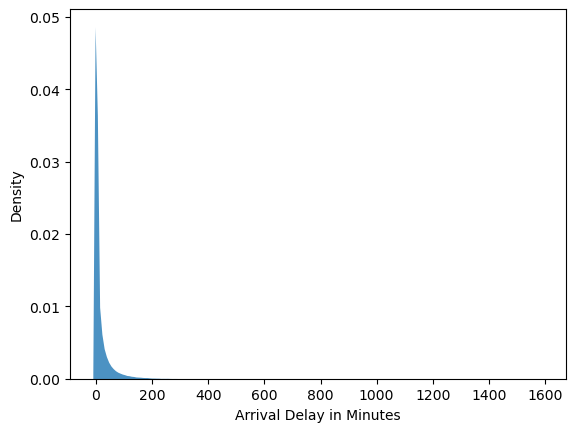

In [34]:
sns.kdeplot(data = df, x = "Arrival Delay in Minutes", shade = True,palette="ch:.25",multiple="stack",fill=True, common_norm=False,alpha=.8, linewidth=0)

<Axes: xlabel='Flight Distance', ylabel='Density'>

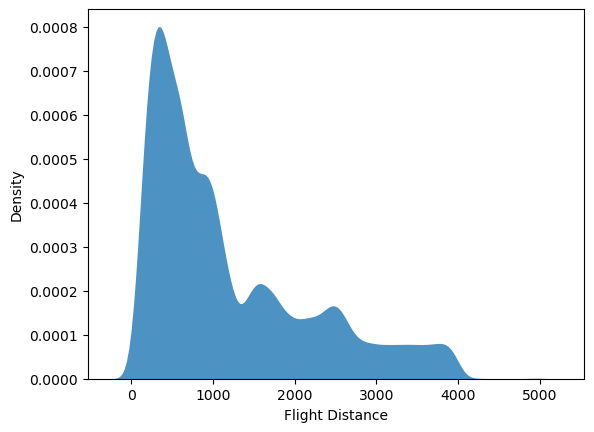

In [35]:
sns.kdeplot(data = df, x = "Flight Distance", shade = True,palette="ch:.25",multiple="stack",fill=True, common_norm=False,alpha=.8, linewidth=0)

<Axes: xlabel='Flight Distance', ylabel='Density'>

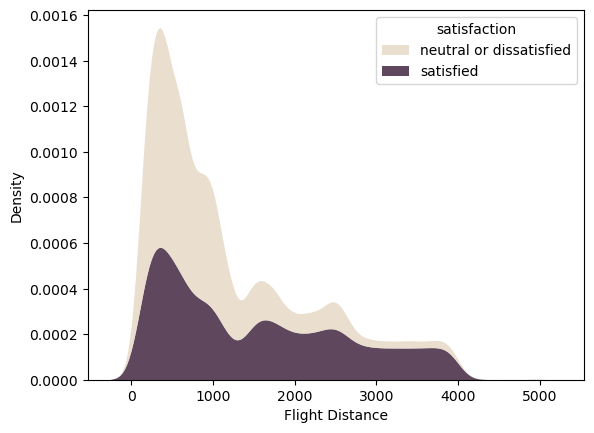

In [36]:
sns.kdeplot(data = df, x = "Flight Distance",hue = "satisfaction" , shade = True,palette="ch:.25",multiple="stack",fill=True, common_norm=False,alpha=.8, linewidth=0)

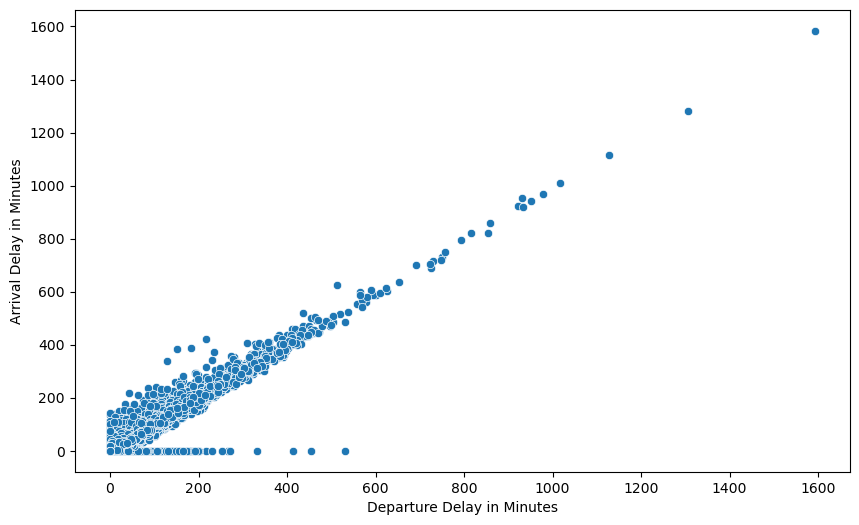

In [37]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = df,palette="ch:.25")
plt.show()

## Survey

In [38]:
survey = df[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]

In [39]:
# This function is designed for generating a count plot with additional features like showing the counts and percentages. 

def count(df, col, hue = None, annot = True, ax = None):
    g = sns.countplot(data = df, x = col, hue = hue,palette="ch:.25_r", ax = ax)
    if annot:
        for p in g.patches:
            percent = p.get_height() * 100 / len(df)
            g.annotate(f"{p.get_height()}\n({percent:.2f}%)",(p.get_x() + 0.2, p.get_height()),
                      ha = "center", va = "bottom")

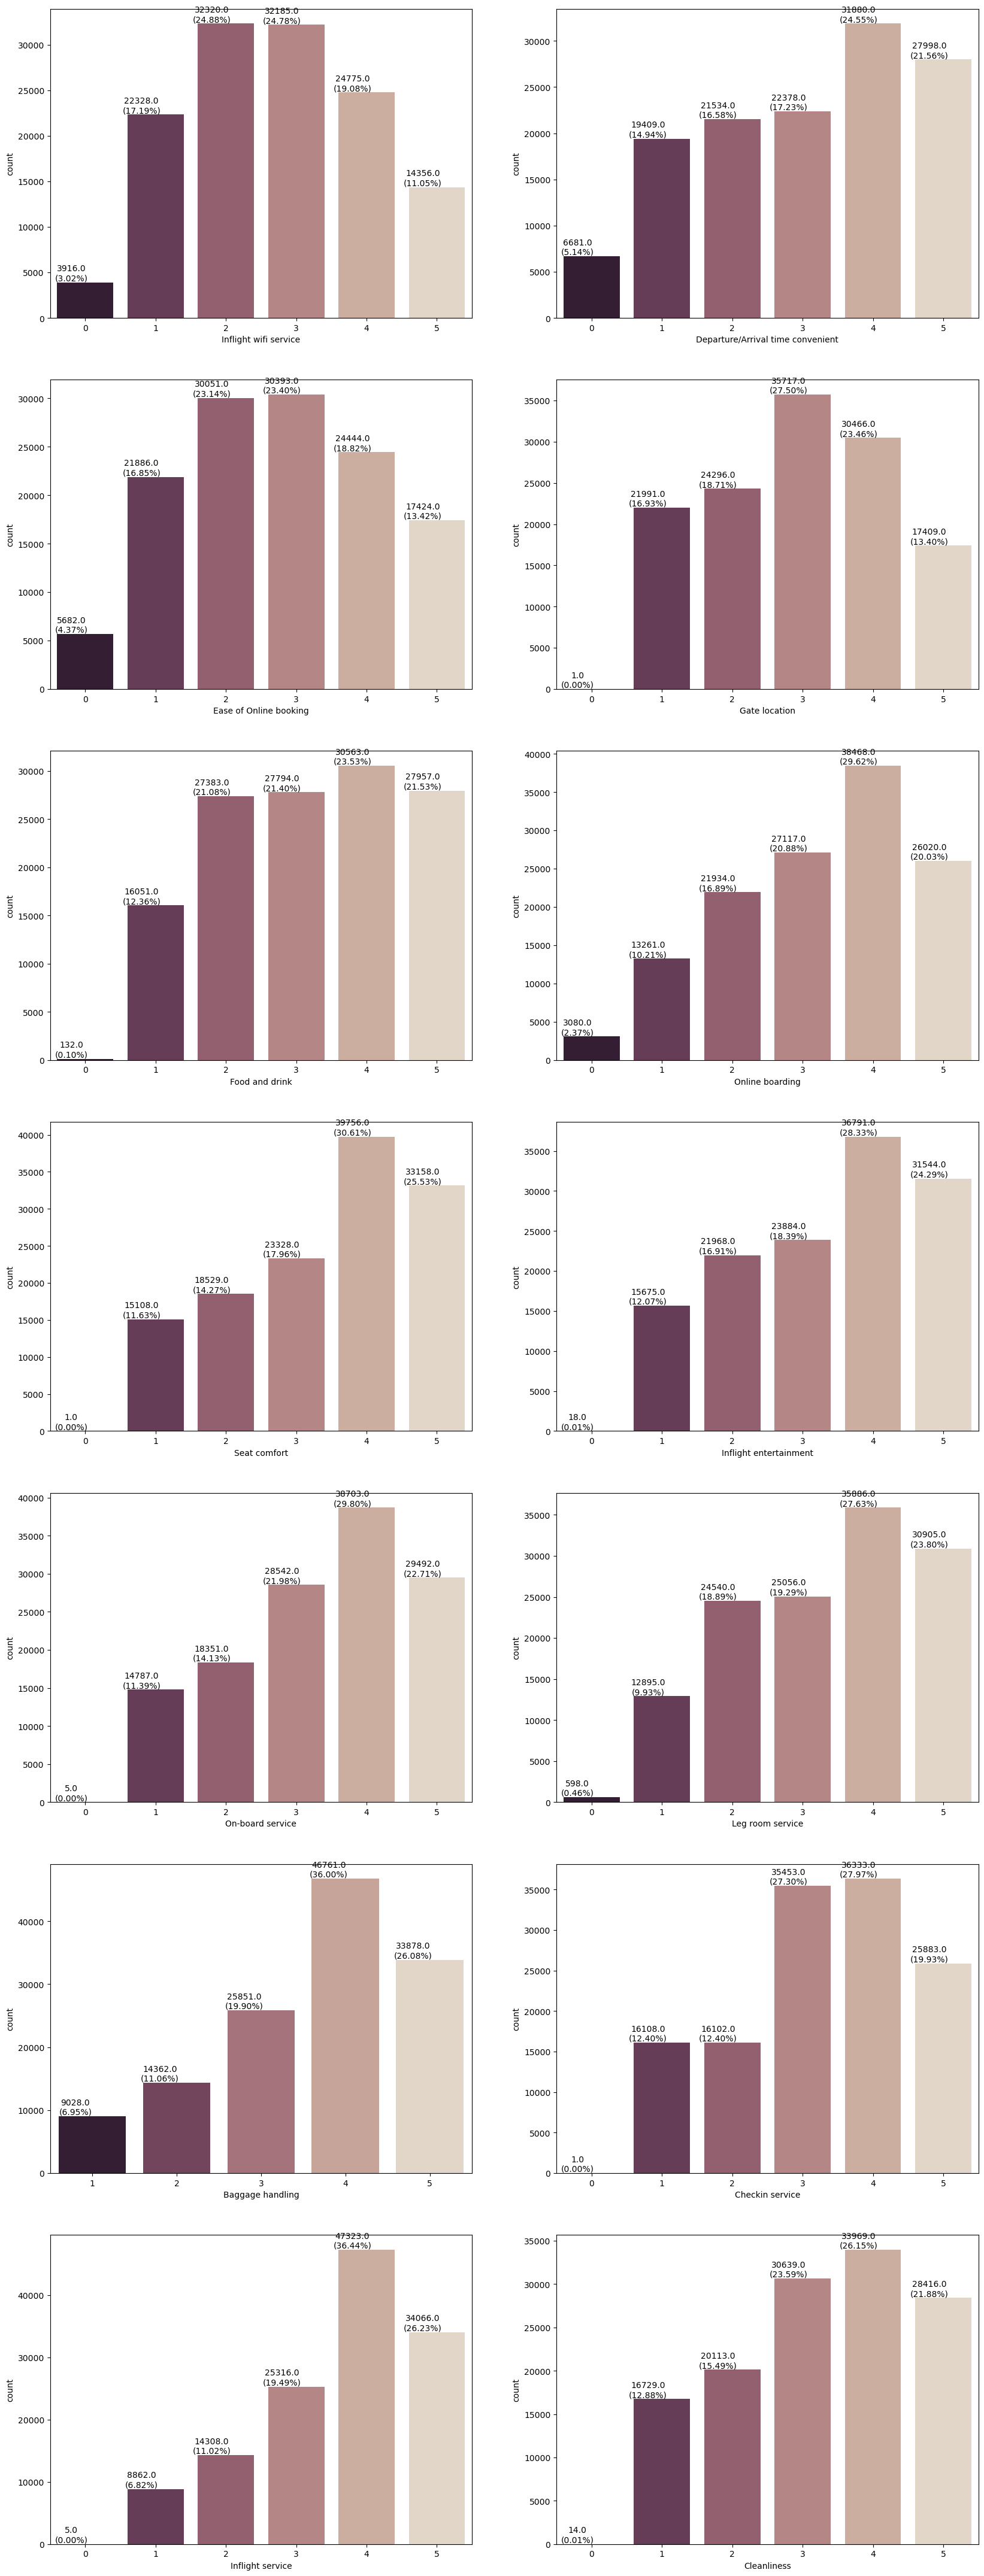

In [40]:
fig, ax = plt.subplots(7, 2, figsize = (20, 55))
for i, service in enumerate(survey):
    count(df, service, ax = ax[i // 2, i % 2])
plt.show()

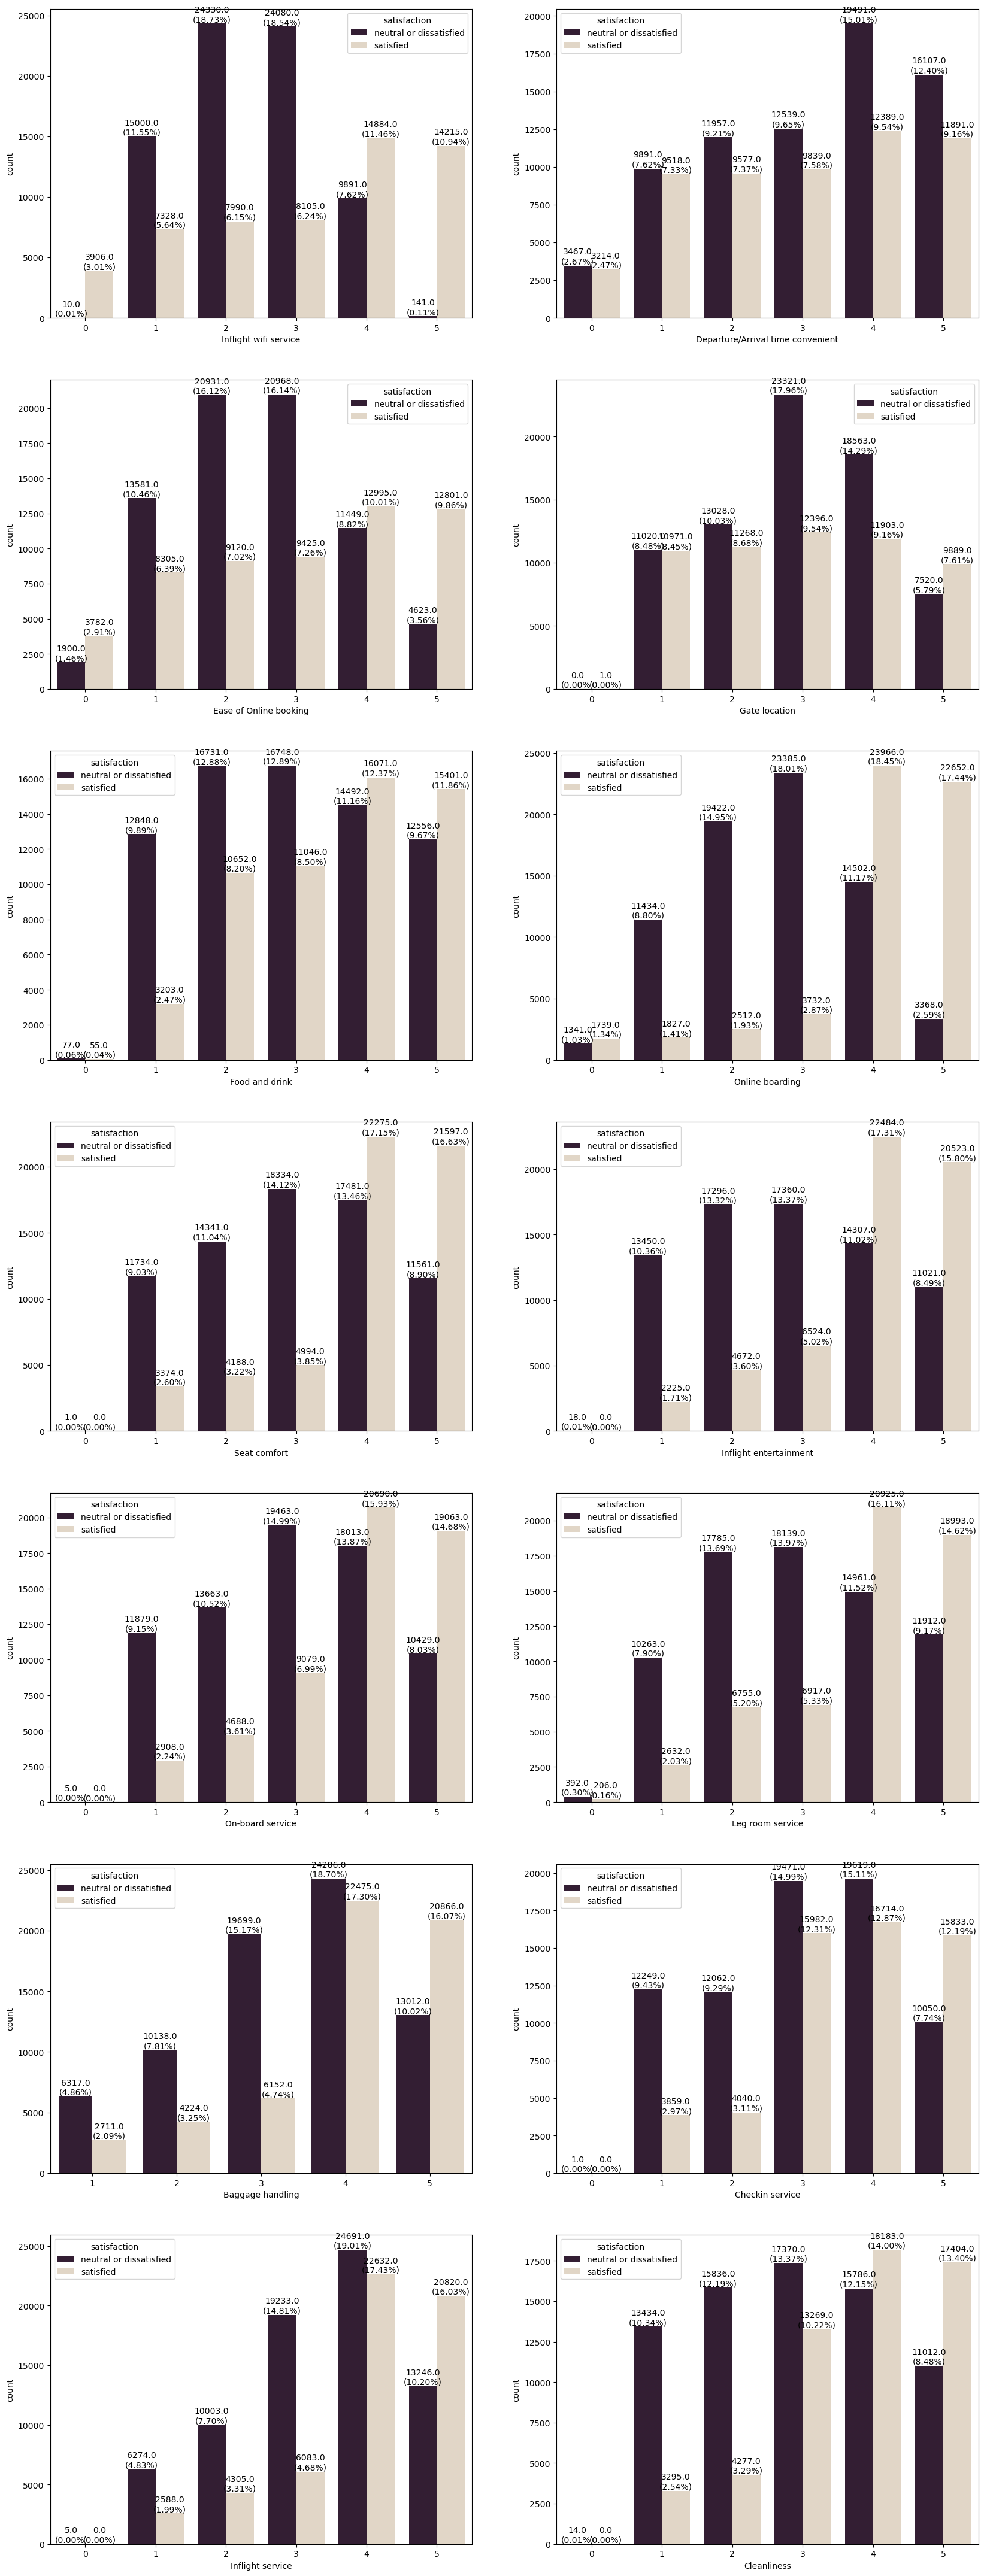

In [41]:
fig, ax = plt.subplots(7, 2, figsize = (20, 55))
for i, service in enumerate(survey):
    count(df, service, hue = "satisfaction", ax = ax[i // 2, i % 2])
plt.show()

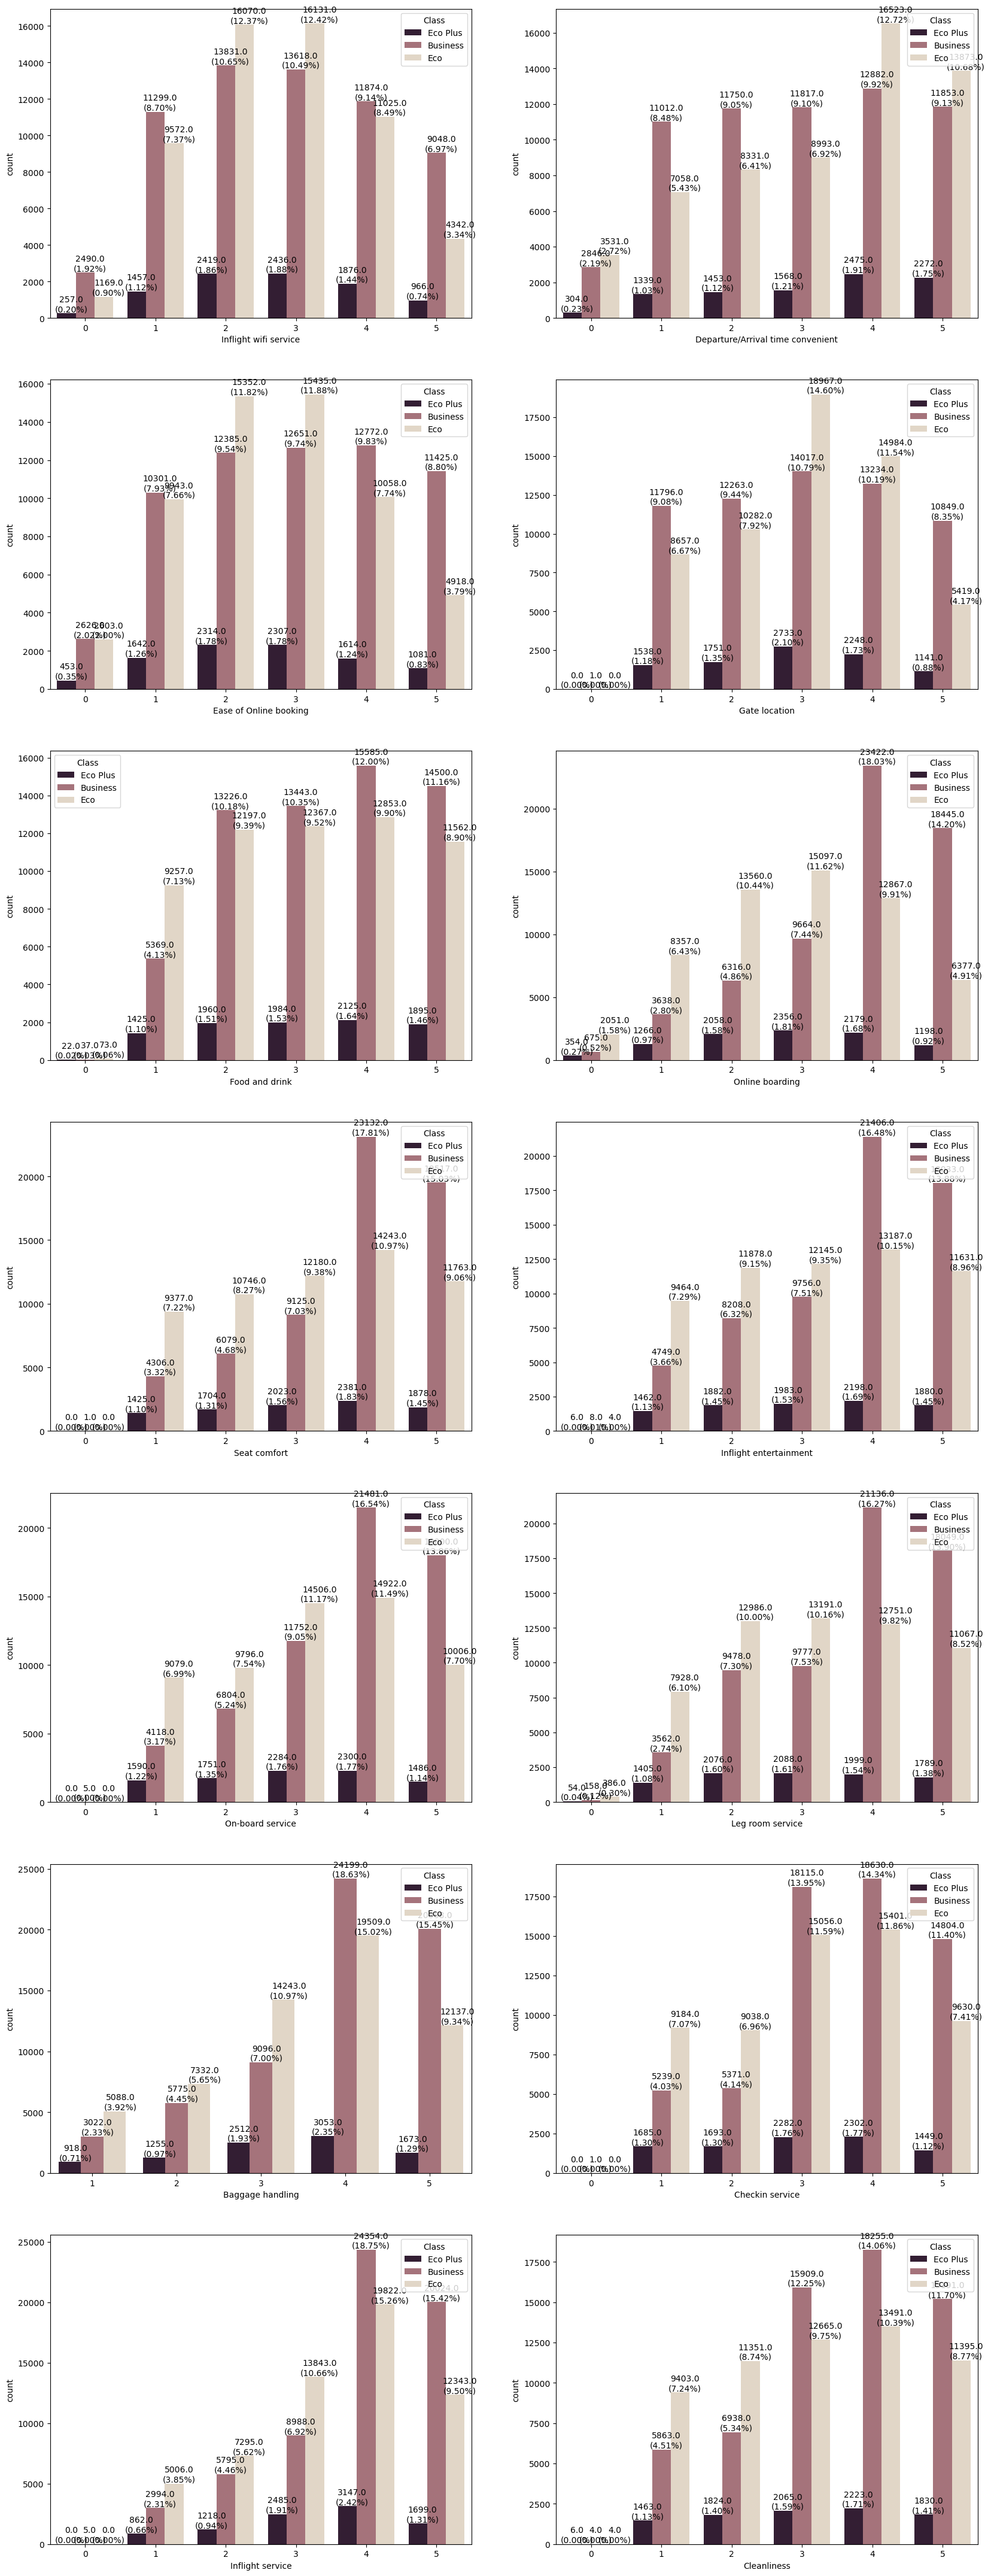

In [42]:
fig, ax = plt.subplots(7, 2, figsize = (20, 55))
for i, service in enumerate(survey):
    count(df, service, hue = "Class", ax = ax[i // 2, i % 2])
plt.show()

## Survey Rating

In [43]:
# This code calculates the mean value for each survey and sorts them in descending order.

survey_rate_list = []
for i in survey.columns:
    survey_rate = survey[i].mean()
    survey_rate_list.append(survey_rate)
scores_table = list(zip(list(survey.columns), survey_rate_list))
survey_sys = pd.DataFrame(scores_table,columns=['survey', 'survey_rate'])
survey_sys.sort_values('survey_rate',ascending=False,inplace=True)
survey_sys.reset_index(inplace = True, drop = True)
survey_sys

,survey,survey_rate
0,Inflight service,3.642193
1,Baggage handling,3.632114
2,Seat comfort,3.441361
3,On-board service,3.383023
4,Inflight entertainment,3.358077
5,Leg room service,3.350878
6,Checkin service,3.306267
7,Cleanliness,3.286326
8,Online boarding,3.252633
9,Food and drink,3.204774


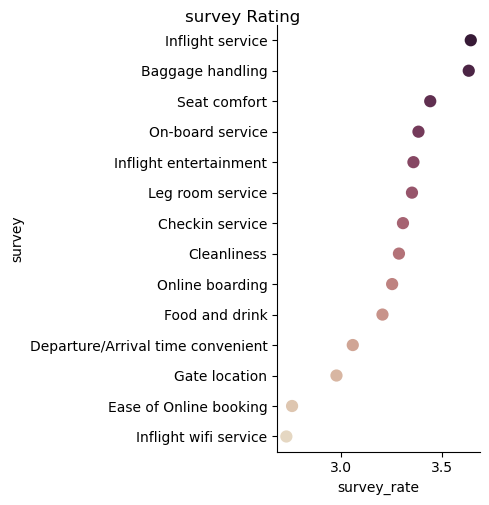

In [44]:
g = sns.catplot(y='survey',x='survey_rate',data=survey_sys,kind="point",palette="ch:.25_r")
g.fig.suptitle("survey Rating ",y=1)
plt.show()

## Satisfaction

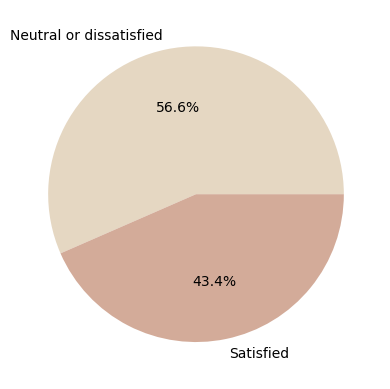

In [45]:
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"],colors = sns.color_palette("ch:.25"), autopct = '%1.1f%%')
pass

# Conclusions

#### **The airline company is facing a big problem as 56.6% of passengers are Neutral or dissatisfied. Gender doesn't appear to affect the satisfaction of the passengers. However, other factors such as age, delay, and some services seem to affect them.**

- **Gender:** Most of the passengers are females and the majority of them seem to be Neutral or dissatisfied.

- **Age:** Satisfied people are about 40-60 years old. Unsatisfied are about 20-40 years old.

- **Passengers:**  47.9% of the customers take business travel and most of them are satisfied while 44.9% of the customers take economy travel and 7.2% take economy plus travel and they both are Neutral or dissatisfied.

- **Flight Distance:**  Most travels are about 600 units of distance.

- **Airline Services:** Most services rate is 4 and the best services they have are (Inflight service and baggage handling) while Inflight Wi-Fi service is the worst.

# PreProcessing

## Encoding

In [46]:
#Perform one-hot encoding

categorical_features = ['Customer Type',	'Type of Travel',	'Class']

df_encoded = pd.get_dummies(df, columns=categorical_features)

df = df_encoded

In [47]:
#Perform label encoding

categorical_column = 'satisfaction'

label_encoder = LabelEncoder()

df[categorical_column] = label_encoder.fit_transform(df[categorical_column])

## Rescaling

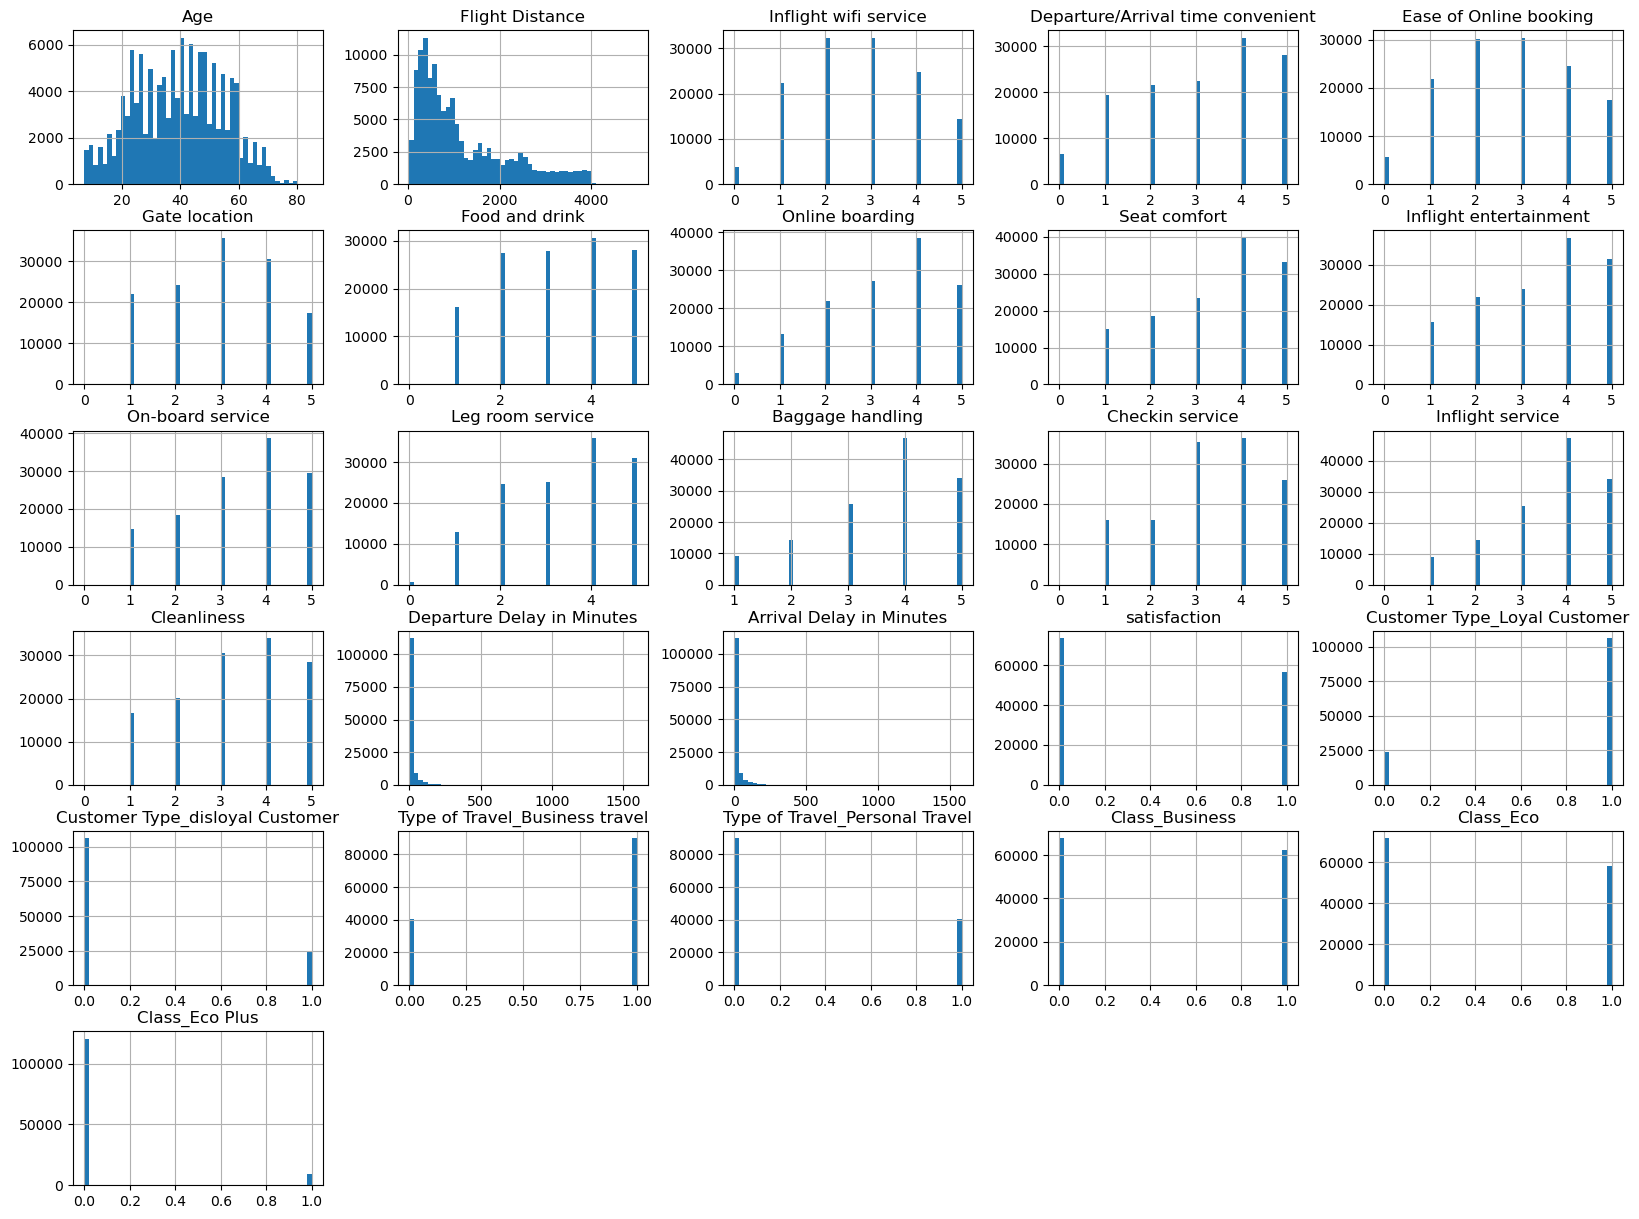

In [48]:
# Showing the distirbution of the data
df.hist(bins=50, figsize=(20,15))
plt.show()

In [49]:
# Detecting outliers
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

In [50]:
# The Percentage of outliers in numerical features
for column in df.select_dtypes(include=[np.number]):
    outliers = detect_outliers_iqr(df[column])
    percentage_outliers = (sum(outliers) / len(df)) * 100
    print(f"Percentage of outliers in {column}: {percentage_outliers}%")

Percentage of outliers in Age: 0.0%
Percentage of outliers in Flight Distance: 2.198182938096705%
Percentage of outliers in Inflight wifi service: 0.0%
Percentage of outliers in Departure/Arrival time convenient: 0.0%
Percentage of outliers in Ease of Online booking: 0.0%
Percentage of outliers in Gate location: 0.0%
Percentage of outliers in Food and drink: 0.0%
Percentage of outliers in Online boarding: 0.0%
Percentage of outliers in Seat comfort: 0.0%
Percentage of outliers in Inflight entertainment: 0.0%
Percentage of outliers in On-board service: 0.0%
Percentage of outliers in Leg room service: 0.0%
Percentage of outliers in Baggage handling: 0.0%
Percentage of outliers in Checkin service: 12.402987372959656%
Percentage of outliers in Inflight service: 0.0%
Percentage of outliers in Cleanliness: 0.0%
Percentage of outliers in Departure Delay in Minutes: 13.9344009855251%
Percentage of outliers in Arrival Delay in Minutes: 13.467816445950106%
Percentage of outliers in satisfaction:

 * I will use 2 types of rescaling for the data because i have some outliers in the data and some methods are sensitive to them

In [51]:
#Perform Standard Scaling

numerical_features = df.select_dtypes(include=['number']).columns.tolist()


exclude_columns = ['Class_Eco Plus', 'Customer Type_disloyal Customer', 'Customer Type_Loyal Customer', 'Checkin service' , 'Arrival Delay in Minutes' , 'Departure Delay in Minutes','Flight Distance']
numerical_features = [col for col in numerical_features if col not in exclude_columns]
scaler = MinMaxScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [52]:
#Perform Robust Scaling

numerical_features = ['Class_Eco Plus', 'Customer Type_disloyal Customer', 'Customer Type_Loyal Customer', 'Checkin service' , 'Arrival Delay in Minutes' , 'Departure Delay in Minutes','Flight Distance']

scaler = RobustScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

## Features Correlation

<Axes: >

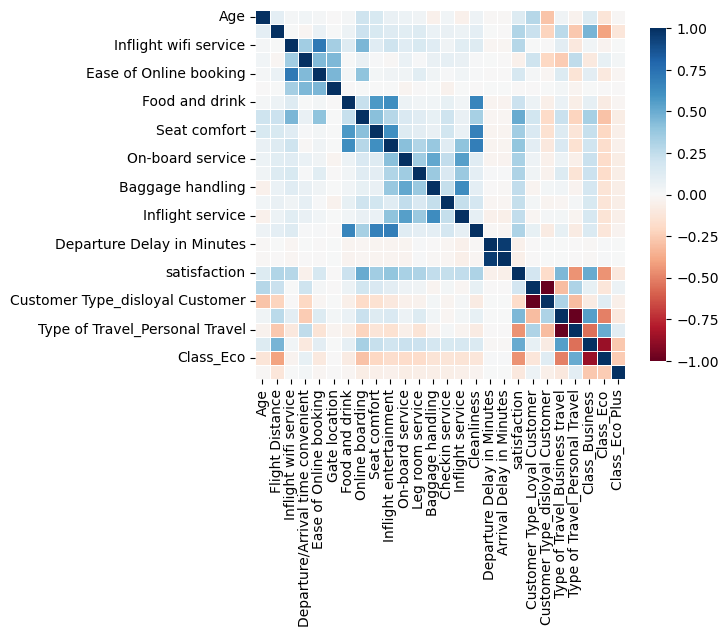

In [53]:
# The Correlation between featuers
corr=df.corr()
sns.heatmap(corr,cmap='RdBu', vmax=None, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .9})

# Modeling

In [54]:
x = df.drop('satisfaction', axis=1)
y = df['satisfaction']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [55]:
model = LogisticRegression()
model.fit(x_train, y_train)
log_Y_pred = model.predict(x_test)

In [56]:
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
gaussian_Y_pred = gaussian.predict(x_test)

In [57]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
random_forest_Y_pred = random_forest.predict(x_test)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.876155   0.872539  0.839264  0.855578
1          Naive Bayes  0.846089   0.828452  0.817069  0.822721
2        Random Forest  0.962927   0.976695  0.937555  0.956725


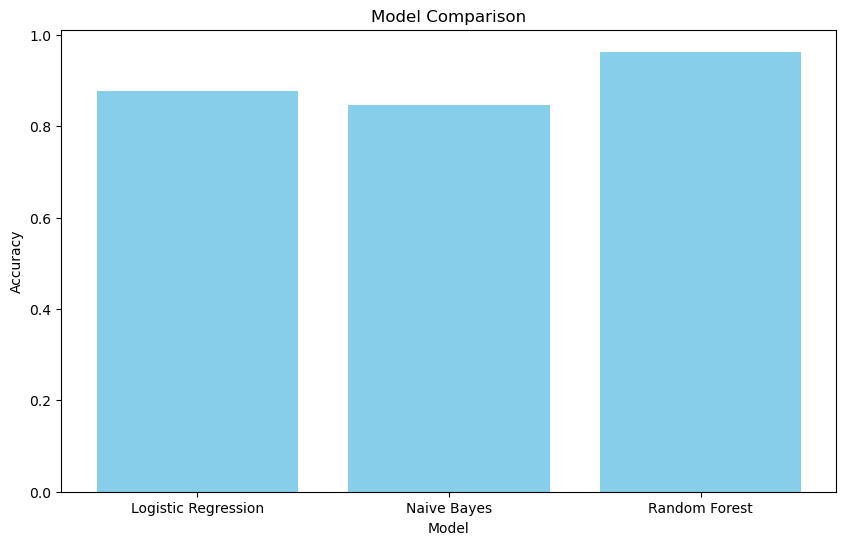

In [60]:
# This code compares different machine learning models using various metrics and visualizes the results.

models = [model,gaussian,random_forest]
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest']

metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score
}

results = []

for model, name in zip(models, model_names):
    model_preds = model.predict(x_test)
    model_results = {"Model": name}
    for metric_name, metric_func in metrics.items():
        model_results[metric_name] = metric_func(y_test, model_preds)
    results.append(model_results)

results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

* Seems like Random Forest is the best model

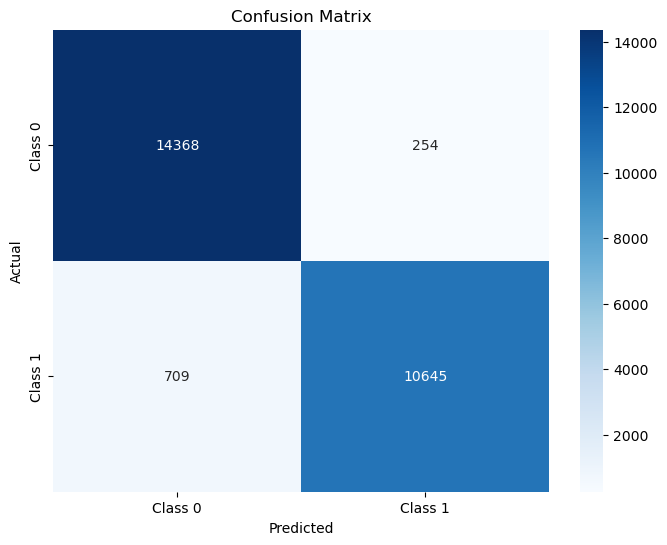

In [61]:
# This code generates a confusion matrix for the Random Forest model's predictions.

conf_mat = confusion_matrix(y_test, random_forest_Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**`Precision:`** The precision of the model is 0.97

**`Recall:`** The recall of the model is 0.93

**`F1-score:`** The F1-score for of the model is 0.95

**`Accuracy:`** The overall accuracy of the model is 0.96